In [ ]:
# @author: Pedro G. Ferreira
#Target: Students of AI and Data Science
#Description: Demonstration of the pipeline of analysis of the Auto dataset, from data pre-processing, data exploration and visualization to model learning.
# - explore the structure of the dataset
# - visualize the variables and their correlation
# - plot data from different perspectives and combination of variables
# - build simple predictive models with KNN and Decision trees
# - evaluate the models in terms of accuraccy.

In [1]:
import numpy as np
import random
import os
import sys
import matplotlib.pyplot as  plt
import pandas as pd
from pandas import read_table, read_csv
import seaborn as sns

In [2]:
# read the csv table using Pandas
auto = pd.read_csv("Auto.tab", sep="\t")

In [3]:
# specify the data structure
type(auto)

pandas.core.frame.DataFrame

In [4]:
# get the the first 5 rows of the table
auto.head(40)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [5]:
# name of the columns
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [6]:
# quick description of the data
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.6+ KB


One of the features is a categorical value described by three integers values (1, 2 and 3). It represents the origin of each of these automobiles. **Guess what is the meaning of each of these categories?

In [7]:
# for the outcome verify the number of classes
auto["origin"].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [8]:
# Summary of the numerical attributes
# get statistics for each attribute
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
# look at a specific attribute
auto.describe()["acceleration"]

count    392.000000
mean      15.541327
std        2.758864
min        8.000000
25%       13.775000
50%       15.500000
75%       17.025000
max       24.800000
Name: acceleration, dtype: float64

In [10]:
auto.describe()["cylinders"]

count    392.000000
mean       5.471939
std        1.705783
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cylinders, dtype: float64

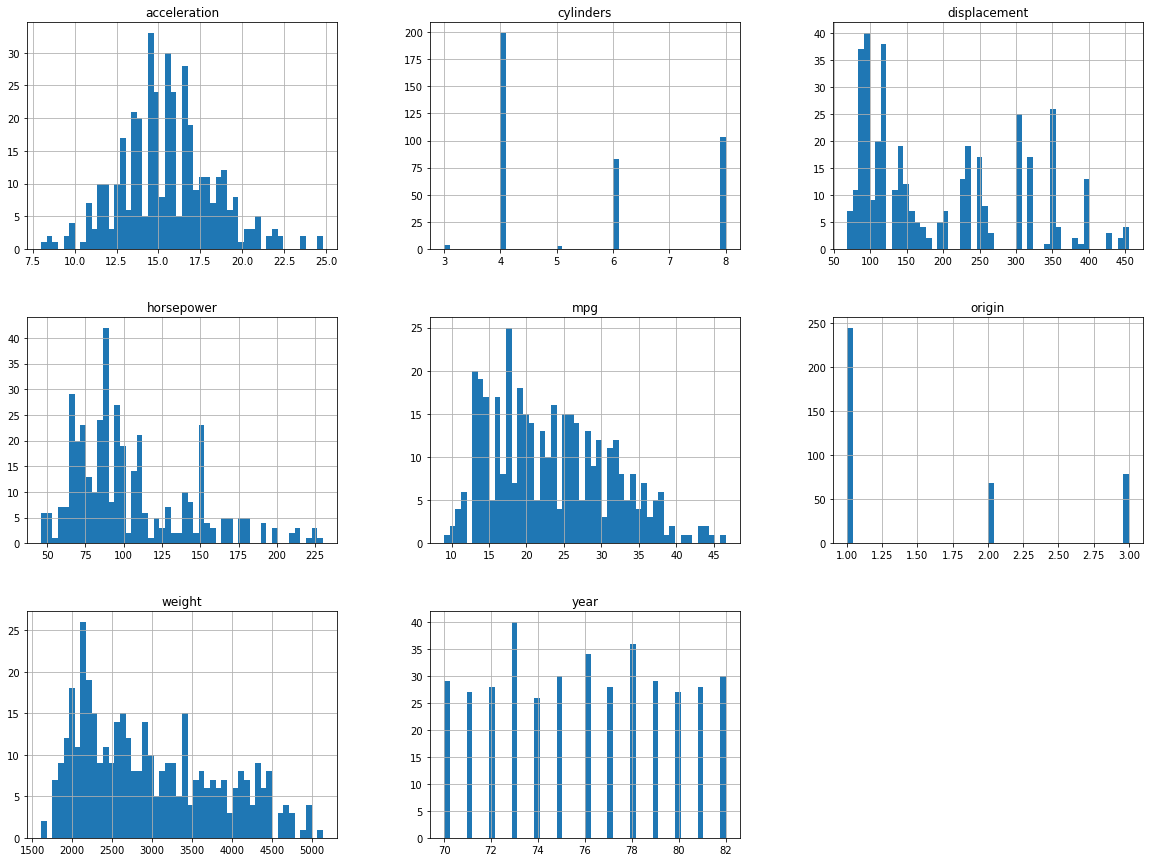

In [11]:
# histogram for each numerical attribute
#%matplotlib inline         # for jupyter notebooks
auto.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline
sns.pairplot(auto.dropna(), hue='origin')

NameError: name 'sb' is not defined

In [ ]:
# how many cases are from origin 1?
sum(auto["origin"] == 1)
# similar approach, different syntax
sum(auto.origin == 1)

In [ ]:
# Select the cases where the origin is two
auto[(auto.origin==2)]

In [ ]:
#lets calculate the average of one feature, e.g. mpg, for one origin, e.g. 1
auto[auto.origin == 1].mpg.mean()

In [ ]:
# Select all cases where horsepower is higher than 100
auto.loc[auto.horsepower > 100,:]
auto.loc[auto.horsepower >100,:].shape

In [ ]:
# Select outcomes for cases where horsepower is higher than 100 and acceleration less than average; count the origin
auto.loc[(auto.horsepower>100) & (auto.acceleration < auto.acceleration.mean()),"origin"].value_counts()
# select cases and make scatter plot
auto.loc[(auto.horsepower>100) & (auto.acceleration < auto.acceleration.mean()),["displacement","weight"]].plot.scatter(x = "displacement", y="weight")

In [ ]:
# Look for correlations between the variables
auto.corr()

In [ ]:
# sort correlation values by BMI
auto.corr()["origin"].sort_values(ascending=False)

In [ ]:
#visualize correlations using heatmap
fig, ax = plt.subplots()
heatmap = plt.pcolor(auto.corr())
cbar = plt.colorbar(heatmap)
# We want to show all labels
ax.set_xticks(np.arange(len(auto.columns)))
ax.set_yticks(np.arange(len(auto.columns)))
ax.set_xticklabels(auto.columns)
ax.set_yticklabels(auto.columns)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.show()


In [ ]:
# Plot selected numerical attributed against every other
# use pandas scatter_matrix function
from pandas.plotting import scatter_matrix
attributes = ["mpg", "acceleration","horsepower","weight"]
scatter_matrix(auto[attributes], figsize=(12,8))

In [ ]:
# plot the origin w.r.t horsepower
auto.plot(kind ="scatter", x = "origin", y = "horsepower", alpha=0.1)

In [ ]:
# Include Seaborn for some graphics
sns.set(style = "whitegrid")
# scatter plot: joint distribution of two variables
sns.relplot(x = "weight", y = "horsepower", data = auto);


In [ ]:
# Create count plot for each origin category in the y-axis
sns.countplot(data = auto, x = "origin")


In [ ]:
# add information of the origin on the previous scatter plot
sns.relplot(x = "weight", y = "horsepower", hue="origin", data = auto);

In [ ]:
# add semantic variable changes the size of each point according to the number of cylinders
sns.relplot(x = "weight", y = "horsepower", hue = "origin" , data = auto, size = "cylinders");

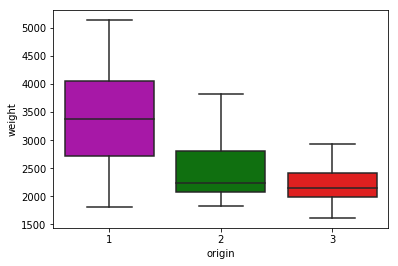

In [13]:
# boxplots of weight grouped by origin 
sns.boxplot(y="weight",  x = "origin", palette=["m", "g","red"], data = auto)


In [14]:
# check the mean values;
print(" weight for 1 ", auto.loc[auto.origin == 1,"weight"].mean(), " weight for 2: ", auto.loc[auto.origin == 2,"weight"].mean())


 weight for 1  3372.4897959183672  weight for 2:  2433.470588235294


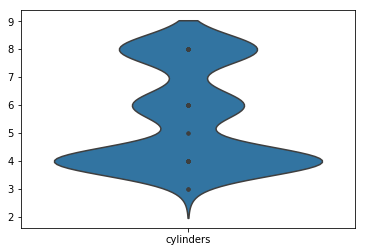

In [15]:
# create a violiplot instead of boxplot
sns.violinplot(data=auto[[ "cylinders"]], inner="points", size=(14,8))


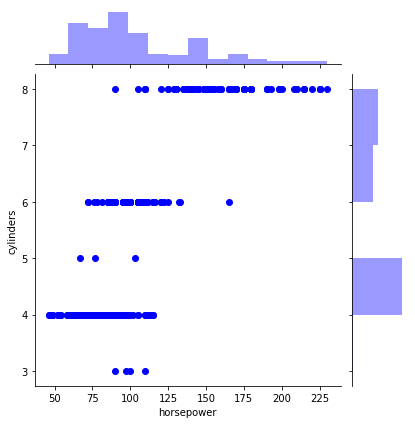

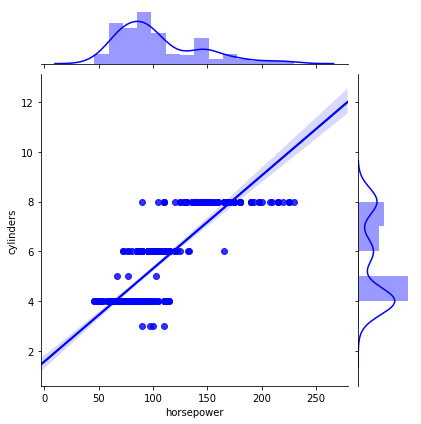

In [16]:
# jointplots are also useful for better understanding point density
sns.jointplot(x = "horsepower", y = "cylinders", data = auto, color="b")
sns.jointplot(x = "horsepower", y = "cylinders", data = auto, color="b", kind = "reg")


In [17]:
#################################################################################
# BUILD A SIMPLE PREDICTIVE MODEL
from sklearn.model_selection import train_test_split
#################################################################################

In [18]:
# create a train/test dataset
SEED = 123
test_size = 0.3

# leave out the name of the car since it may be irrelevant; consider the age?
X = auto.iloc[:,0:7]
Y = auto.iloc[:,7]
# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state = SEED)


In [19]:
# test the proportion of each origina class in the datasets
y_train.value_counts() / len(y_train) * 100
y_test.value_counts() / len(y_test) * 100

1    64.406780
2    19.491525
3    16.101695
Name: origin, dtype: float64

In [20]:
# create datasets mainting the representation of the output labels --> stratify = Yes
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state = SEED, stratify=Y)

In [ ]:
# 1) You got the data and explored it
# 2) Clean the data (basic pre-processing)
# 3) create a train and test dataset
# Now select and train a ML model
# Two models: Instance-based: KNN and Model-based Logistic Regression

In [21]:
# Decission Tree and K-N classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [22]:
# create and train a KNN model
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
# prediction of the training set
knn_preds_train = knn.predict(X_train)
# calculate the percentage of cases correctly classified
knn_acc_train = sum(knn_preds_train == y_train)/ len(y_train)
# prediction of the test set
knn_preds_test = knn.predict(X_test)
# calculate the percentage of cases correctly classified
knn_acc_test = sum(knn_preds_test == y_test)/ len(y_test)

In [31]:
# create and train a Decision Tree model
# maximum depth of the tree is 3
dt = DecisionTreeClassifier(max_leaf_nodes = 3, random_state=0)
dt.fit(X_train, y_train)
# prediction o the training set
dt_preds_train = dt.predict(X_train)
# calculate the percentage of cases correctly classified
dt_acc_train = sum(dt_preds_train == y_train)/ len(y_train)
# prediction of the test set
dt_preds_test = dt.predict(X_test)
# calculate the percentage of cases correctly classified
dt_acc_test = sum(dt_preds_test == y_test)/ len(y_test)

In [32]:
print ("Decision Tree Train Accuracy: %.3f" % dt_acc_train)
print ("Decision Tree Test Accuracy: %.3f" % dt_acc_test)
print ("KNN Train Accuracy: %.3f" % knn_acc_train)
print ("KNN Test Accuracy: %.3f" % knn_acc_test)

Decision Tree Train Accuracy: 0.770
Decision Tree Test Accuracy: 0.737
KNN Train Accuracy: 0.850
KNN Test Accuracy: 0.686


In [33]:
# Better evaluation using Cross-validation
from sklearn.model_selection import cross_val_score
dt_scores = cross_val_score(dt, X, Y, scoring="accuracy", cv = 10)
knn_scores = cross_val_score(knn, X, Y, scoring="accuracy", cv = 10)

In [30]:
print ("Decision Tree Accuracy Avg: %.3f  Std: %.3f" % (dt_scores.mean()*100, dt_scores.std()*100))
print ("KNN Accuracy Avg: %.3f  Std: %.3f" % (knn_scores.mean()*100, knn_scores.std()*100))

Decision Tree Accuracy Avg: 69.767  Std: 5.915
KNN Accuracy Avg: 70.234  Std: 9.867


In [ ]:
# Evaluate the impact of a larger or smaller max_leaf_nodes or change the measure the quality of a split to "entropy"
# evaluate if the accurracy results change?